# TRABAJO FINAL - APRENDIZAJE AUTOMÁTICO
###  - Nuria Bango Iglesias
###  - Álvar De Diego López

# Abalone UCI
### Prediciendo la edad de los abalones dadas medidas físicas. 

***

## Contexto

El abulón es el nombre común de un grupo de caracoles marinos de pequeño a gran tamaño, que se encuentran habitualmente en las costas de todo el mundo y se utilizan como manjar en las cocinas. Su concha sobrante se utiliza en joyería debido a su brillo iridiscente. 

Debido a su demanda y valor económico, a menudo se recolecta en granjas, por lo que es necesario predecir la edad del abalón a partir de medidas físicas. El método tradicional para determinar su edad consiste en cortar la concha a través del cono, teñirla y contar el número de anillos a través de un microscopio, una tarea aburrida y que requiere mucho tiempo, por lo que predecir la edad utilizando otros factores como el peso o la altura que se pueden medir fácilmente agilizaría el proceso.

Sabemos que a medida que el abalón crece añade anillos, y a medida que añade nuevas capas a la concha aumenta el peso y el diámetro de la misma. Se puede ver en la imagen de abajo:


<img src="abalone_rings.jpg" width="500" />

***

## Datos

Número de instancias: 4177

Número de atributos: 8

Objetivo: Anillos (Rings)

<img src="abalone_partes.jpg" width="500" />

| Atributo | Tipo de datos| Unidades | Descripción |
| :----: | :----: | :----: | :----: |
| Sex | nominal | - | M (masculino), F (femenino), I (infantes) | 
| Length | continuous | mm |  Longitud de la cáscara | 
| Diameter | continuous | mm | Perpendicular a la longitud | 
| Height | continuous | mm | Con carne en la cáscara | 
| Whole weight | continuous | grams | Abalón completo | 
| Shucked weight | continuous | grams | Peso de la carne |
| Viscera weight | continuous | grams | Peso de la tripa (después del sangrado) |
| Shell weight | continuous | grams | Después de ser secado |
| Rings | integer | - | +1.5 da la edad en años | 



## Primeros pasos

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt # plotting
import scipy.stats as stats # Stats API
import seaborn as sns 
sns.set(style='whitegrid', palette='colorblind') 

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
df = pd.read_csv('abalone_original.csv')
df.dataframeName = 'abalone_original.csv'

In [23]:
df

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7
...,...,...,...,...,...,...,...,...,...
4172,F,113,90,33,177.4,74.0,47.8,49.8,11
4173,M,118,88,27,193.2,87.8,42.9,52.1,10
4174,M,120,95,41,235.2,105.1,57.5,61.6,9
4175,F,125,97,30,218.9,106.2,52.2,59.2,10


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   int64  
 2   diameter        4177 non-null   int64  
 3   height          4177 non-null   int64  
 4   whole-weight    4177 non-null   float64
 5   shucked-weight  4177 non-null   float64
 6   viscera-weight  4177 non-null   float64
 7   shell-weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 293.8+ KB


# Análisis de variables individuales

***

## Sexo

A partir de los campos de descripción de los datos iniciales sabemos que el sexo se clasifica en Macho, Hembra, lo cual tiene sentido, mientras que Infante parece estar mal clasificado o fue clasificado así ya que era difícil decir el sexo en el momento de la observación ya que el Abalón era Infante.

Vamos a confirmar primero que son 3 las categorias y cual de ellas es más frecuente.

In [27]:
df.sex.describe()

count     4177
unique       3
top          M
freq      1528
Name: sex, dtype: object

Podemos confirmar que la categoría sexo sólo tiene 3 campos, principalmente: masculino, femenino e infantil, siendo el masculino el más frecuente. 

Veamos su densidad, para entender en qué medida es mayor el sexo masculino que el femenino y el infantil en este conjunto de datos.

In [29]:
df.sex.value_counts(normalize=True).sort_index()

F    0.312904
I    0.321283
M    0.365813
Name: sex, dtype: float64

Por lo tanto, hay un número significativamente mayor de hombres que de otras dos categorías, visualicemos ya que las mujeres y los niños están muy cerca utilizando la densidad relativa para tener una idea de sus diferencias.

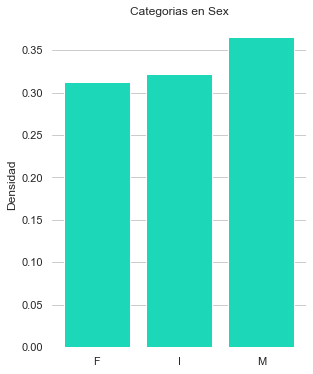

In [31]:
df_sex_category = df.sex.value_counts(normalize=True).sort_index()
x = range(len(df_sex_category))
figure = plt.figure(figsize=(10, 6))
axes1 = figure.add_subplot(1, 2, 1)
axes1.bar(x, df_sex_category, color="#1DD7B9",align="center")
axes1.set_xticks(x)
axes1.set_xticklabels(df_sex_category.axes[0])
axes1.set_title("Categorias en Sex")
axes1.set_ylabel("Densidad")
axes1.xaxis.grid(False)
axes1.tick_params(bottom=False, top=False, left=False, right=False)
for spine in axes1.spines.values():
    spine.set_visible(False)
axes1.yaxis.grid(b=True, which="major")

Hay aproximadamente la misma proporción de mujeres y niños, con un poco más de hombres que de mujeres o niños.

Una cosa que podemos notar, es que presumiblemente el sexo es mucho más difícil de reconocer en los infantes y esto es evidente basado en que tenemos ligeramente más infantes que hembras.

## Longitud

Hagamos una estadística de resumen para ver cómo se distribuye la longitud, esperamos que siga una distribución normal, con algo de asimetría teniendo en cuenta que tenemos niños en el conjunto de datos.

In [33]:
df.length.describe()

count    4177.000000
mean      104.798420
std        24.018583
min        15.000000
25%        90.000000
50%       109.000000
75%       123.000000
max       163.000000
Name: length, dtype: float64

Lo primero que destaca es que el mínimo es realmente pequeño, 15 mm, lo que tiene sentido debido a los bebés en el conjunto de datos, que puede ser la razón por la que la distribución tendría una distribución sesgada a la izquierda.

Vamos a visualizarlo con un gráfico de caja para verificarlo, y ver si hay alguna anomalía como valores atípicos en la longitud.


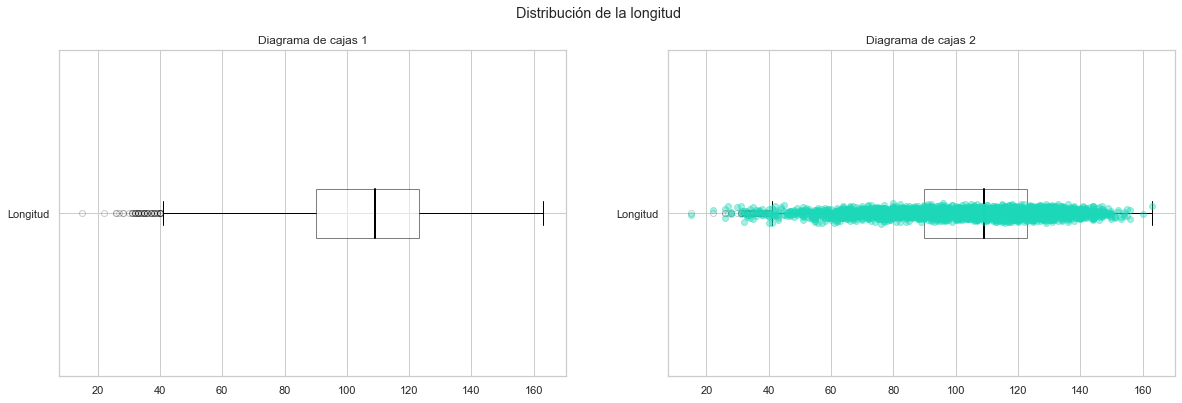

In [35]:
def restyle_boxplot(patch):
    for whisker in patch['whiskers']:
        whisker.set(color='#000000', linewidth=1)

    for cap in patch['caps']:
        cap.set(color='#000000', linewidth=1)

    for median in patch['medians']:
        median.set(color='#000000', linewidth=2)

    for flier in patch['fliers']:
        flier.set(marker='o', color='#000000', alpha=0.2)

    for box in patch["boxes"]:
        box.set(facecolor='#FFFFFF', alpha=0.5)

def numeric_boxplot(numeric_df, label, title):
    figure = plt.figure(figsize=(20, 6))
    figure.suptitle(title)
    axes1 = figure.add_subplot(1, 2, 1)
    patch = axes1.boxplot(numeric_df, labels=[label], vert=False, showfliers = True, patch_artist=True, zorder=1)
    restyle_boxplot(patch)
    axes1.set_title('Diagrama de cajas 1')
    axes2 = figure.add_subplot(1, 2, 2)
    patch = axes2.boxplot(numeric_df, labels=[label], vert=False, patch_artist=True, zorder=1)
    restyle_boxplot(patch)
    axes2.set_title('Diagrama de cajas 2')
    y = np.random.normal(1, 0.01, size=len(numeric_df))
    axes2.plot(numeric_df, y, 'o', color='#1DD7B9', alpha=0.4, zorder=2)
    plt.show()
    plt.close()

numeric_boxplot(df.length, 'Longitud', 'Distribución de la longitud')

El diagrama 1 nos dice que existen valores atípicos entre los rangos de 20 a 40, lo que presumiblemente se debe a la presencia de infantes o de especies particulares de abulón de pequeño tamaño.

En el diagrama 2 podemos ver que la distribución está efectivamente sesgada a la izquierda y que los valores se centran en el rango 100-140.

## Peso

De las cuatro medidas de peso diferentes: El peso de la cáscara, el peso de las vísceras, el peso del descascarillado y alguna masa desconocida de agua/sangre perdida por el proceso de descascarillado, intentaremos sacar conclusiones como peso total.

Peso total = peso de la cáscara+peso de la víscera+peso del descascarillado+masa desconocida de agua/sangre perdida

Analizaremos todos los pesos juntos ya que están relacionados entre sí y deberían tener estadísticas similares.

Exploremos primero las estadísticas para todas las características del peso:


In [37]:
df[['whole-weight', 'shucked-weight', 'viscera-weight', 'shell-weight']].describe()

,whole-weight,shucked-weight,viscera-weight,shell-weight
count,4177.000000,4177.000000,4177.000000,4177.000000
mean,165.748432,71.873498,36.118722,47.766172
std,98.077804,44.392590,21.922850,27.840534
min,0.400000,0.200000,0.100000,0.300000
25%,88.300000,37.200000,18.700000,26.000000
50%,159.900000,67.200000,34.200000,46.800000
75%,230.600000,100.400000,50.600000,65.800000
max,565.100000,297.600000,152.000000,201.000000


De las estadísticas resumidas anteriores podemos ver que cada característica de peso tiene una media mayor que la mediana, por lo que podemos esperar una asimetría derecha en la distribución, a diferencia de la longitud y el diámetro.

Para todo el peso, podemos ver que los rangos de peso van desde el más bajo de alrededor de 0 gramos hasta el máximo que pesa alrededor de 570 gramos.

Es de esperar una tendencia similar, y parece que los pesos tienen una alta varianza, y esto vuelve a lo que dijimos antes, en cuanto a que el abalón es una colección de tamaños pequeños y grandes, por lo que deberíamos esperar que los pesos varíen entre los abalones.

Ahora vamos a visualizar la dispersión con un histograma de densidad para ver si parece normal y tiene la asimetría correcta.


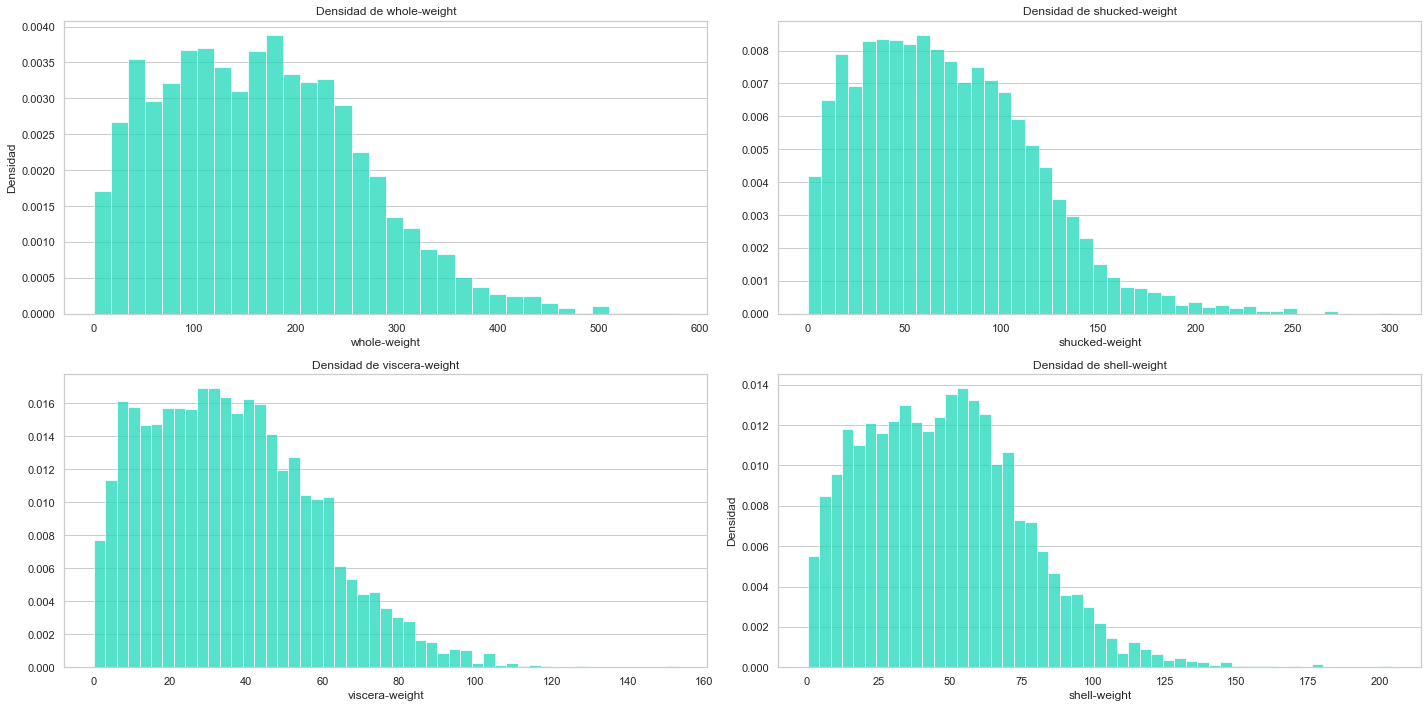

In [39]:
def freeman_diaconis(data):
    quartiles = stats.mstats.mquantiles(data, [0.25, 0.5, 0.75])
    iqr = quartiles[2] - quartiles[0]
    n = len(data)
    h = 2.0 * (iqr/n**(1.0/3.0))
    return int(h)

weights = ['whole-weight', 'shucked-weight', 'viscera-weight', 'shell-weight']
figure = plt.figure(figsize=(20, 10))
for i, k in enumerate(weights):
    axes = figure.add_subplot(2, 2, i + 1)
    subdata = df[k]
    binwidth = freeman_diaconis(subdata)
    bins = np.arange(min(subdata), max(subdata) + binwidth, binwidth)
    axes.hist(subdata, color="#1DD7B9", bins=bins, density=True, alpha=0.75)
    axes.xaxis.grid(False)
    axes.set_title("Densidad de {}".format(k))
    if (i % 3 == 0):
        axes.set_ylabel("Densidad")
    axes.set_xlabel(k)
plt.tight_layout()


De hecho, la distribución está sesgada a la derecha y el peso de la cáscara y el peso de las vísceras son similares al peso entero y entre sí.

Ahora podemos esperar que el peso entero esté altamente correlacionado con otras variables de peso, lo que no nos ayuda mucho a predecir la edad.

## Anillos

Sabemos que los anillos son un predictor de la edad, por lo que son valores enteros, ya que se cuentan como una cantidad discreta en lugar de valores continuos, por lo que deberíamos ver distribuciones discretas con los anillos, y los recuentos serían más apropiados para el eje Y.

Ahora vamos a empezar con las estadísticas de resumen para ver cuál es el número mínimo y máximo de anillos, y dónde se encuentra la media de la muestra.


In [41]:
df.rings.describe()


count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: rings, dtype: float64

Podemos ver que la mayoría de los anillos están entre 8 y 10, mientras que la media está en torno a 10, y como la media es mayor que la mediana, la distribución sería sesgada a la derecha. La varianza de la muestra es menor, por lo que la distribución sería más estrecha, podemos trazar un histograma de densidad para comprobarlo.


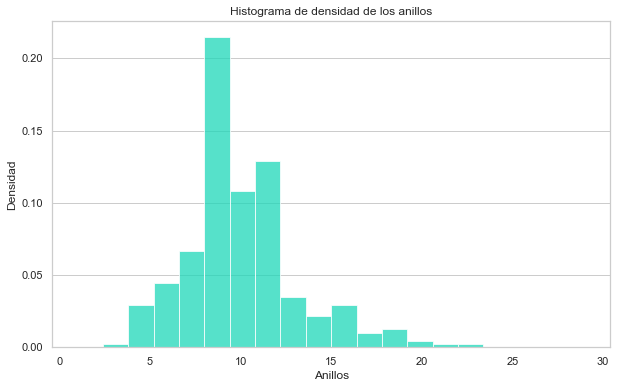

In [43]:
bins = np.arange(min(df.rings), max(df.rings) + binwidth, binwidth)
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
axes.hist(df.rings, color="#1DD7B9", bins=20, density=True, alpha=0.75)
axes.set_ylabel("Densidad")
axes.set_xlabel("Anillos")
axes.set_title("Histograma de densidad de los anillos")
axes.xaxis.grid(False)
plt.show()

Efectivamente, es como esperábamos, la distribución es sesgada a la derecha y tiene menos dispersión, con una media en torno a 10, por lo que la edad del abalón estaría en torno a los 11,5 años.

# Análasis a pares

Antes de realizar el análisis por pares, visualicemos la matriz de coeficientes de correlación en forma de mapa de calor para entender qué análisis por pares debemos comprobar.

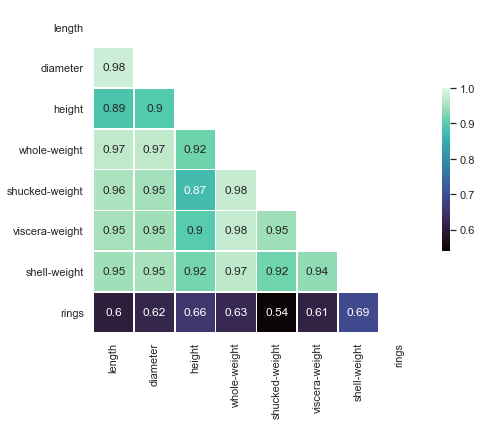

In [45]:
corr = df.corr('spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,cmap="mako", mask=mask, vmax=1, square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True)
plt.show()
plt.close()

Observamos que muchas de las variables están altamente correlacionadas entre sí con r > 0,7, podemos esperar que los pesos estén relacionados entre sí como vimos en el análisis univariante, pero es inesperado ver que la altura también está relacionada con los pesos, y la longitud y el diámetro.

Podemos ignorar las otras variables de peso ya que no nos dan ninguna información nueva que conozcamos, también esperamos saber que la longitud, la altura y el diámetro están relacionados linealmente, para el cálculo de peso habría que centrarse en:

- la altura frente al peso total
- la longitud frente al peso total
- el diámetro frente al peso total.

Con estas conclusiones podemos aventurarnos a decir que hay una correlación algo débil entre los anillos y otras variables.


# Prediciendo Anillos


## Redes Neuronales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   length          4177 non-null   int64  
 1   diameter        4177 non-null   int64  
 2   height          4177 non-null   int64  
 3   whole-weight    4177 non-null   float64
 4   shucked-weight  4177 non-null   float64
 5   viscera-weight  4177 non-null   float64
 6   shell-weight    4177 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 228.6 KB
(4177, 7)
(4177,)
(4177, 2)

Prueba 1 ----------------------------------

c:\Users\alvar\Documents\GitHub\AprendizajeAutomatico\Proyecto Final\ML_utilities.py:23: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))

Neural Network (Lambda: 0.001 | Iterations: 600) success rate: 57.122336605219054%

Prueba 2 ----------------------------------



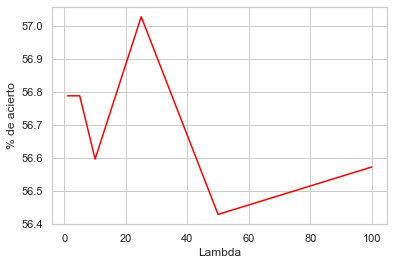

Success rates: [56.78716782 56.78716782 56.59564281 57.0265741  56.42805842 56.57170218]

Parte 3 ----------------------------------

c:\Users\alvar\Documents\GitHub\AprendizajeAutomatico\Proyecto Final\ML_utilities.py:23: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


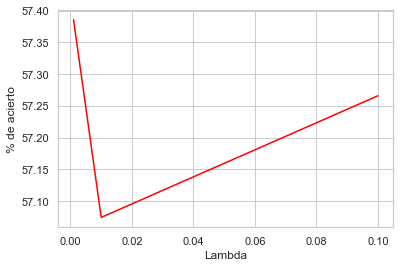

Success rates: [57.3856835  57.07445535 57.26598037]


In [20]:
import ML_utilities as ml

df = pd.read_csv("abalone_original.csv")

df['newRings'] = np.where(df['rings'] > 10,1,0)

X = df.drop(['newRings','rings','sex'], axis = 1)
y = df['newRings']

X.info()

m = X.shape[0]
num_entradas = 7
num_ocultas = 9
num_etiquetas = 2

print(X.shape)
print(y.shape)

# Convertimos y en una matriz de 1 y 0
y_0 = np.where(y == 0, 1, 0)
y_1 = np.where(y == 1, 1, 0)
Y = np.vstack((y_0, y_1))
Y = Y.T
print(Y.shape)


def prueba1():
    print("\nPrueba 1 ----------------------------------\n")
    num_iter = 600

    theta1 = np.zeros((num_ocultas, num_entradas + 1))
    theta2 = np.zeros((num_etiquetas, num_ocultas + 1))

    Lambda = 0.001

    percentage = ml.neural_network_training(theta1, theta2, num_entradas, num_ocultas, num_etiquetas, X, Y, Lambda, num_iter)
    print("\nNeural Network (Lambda: {} | Iterations: {}) success rate: {}%".format(Lambda, num_iter, percentage))

def prueba2():
    print("\nPrueba 2 ----------------------------------\n")
    num_iter = 600

    theta1 = np.zeros((num_ocultas, num_entradas + 1))
    theta2 = np.zeros((num_etiquetas, num_ocultas + 1))

    lambdas = np.array([1, 5, 10, 25, 50, 100])
    percentages = np.zeros(len(lambdas))

    for i in range(len(lambdas)):
        percentages[i] = ml.neural_network_training(theta1, theta2, num_entradas, num_ocultas, num_etiquetas, X, Y, lambdas[i], num_iter)

    plt.plot(lambdas, percentages, color="red")
    plt.xlabel("Lambda")
    plt.ylabel("% de acierto")
    plt.show()

    print("Success rates: {}".format(percentages))

def prueba3():
    print("\nParte 3 ----------------------------------\n")
    num_iter = 600

    theta1 = np.zeros((num_ocultas, num_entradas + 1))
    theta2 = np.zeros((num_etiquetas, num_ocultas + 1))

    lambdas = np.array([0.001, 0.01, 0.1])
    percentages = np.zeros(len(lambdas))

    for i in range(len(lambdas)):
        percentages[i] = ml.neural_network_training(theta1, theta2, num_entradas, num_ocultas, num_etiquetas, X, Y, lambdas[i], num_iter)

    plt.plot(lambdas, percentages, color="red")
    plt.xlabel("Lambda")
    plt.ylabel("% de acierto")
    plt.show()

    print("Success rates: {}".format(percentages))


# Hacemos un experimento base con lambda = 0.001 y 600 iteraciones
prueba1()

# Hacemos un experimento con lambda = 1, 5, 10, 25, 50
prueba2()

# Hacemos otro experimento con lambda = 0.001, 0.01, 0.1
prueba3()

## SVM

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   length          4177 non-null   int64  
 1   diameter        4177 non-null   int64  
 2   height          4177 non-null   int64  
 3   whole-weight    4177 non-null   float64
 4   shucked-weight  4177 non-null   float64
 5   viscera-weight  4177 non-null   float64
 6   shell-weight    4177 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 228.6 KB
Porcentaje de acierto (C = 1): 64.47%
Porcentaje de acierto (C = 11): 65.55%
Porcentaje de acierto (C = 21): 65.43%
Porcentaje de acierto (C = 31): 65.55%
Porcentaje de acierto (C = 41): 66.03%
Porcentaje de acierto (C = 51): 66.03%
Porcentaje de acierto (C = 61): 66.03%
Porcentaje de acierto (C = 71): 66.15%
Porcentaje de acierto (C = 81): 66.15%
Porcentaje de acierto (C = 91): 66.03%
Porcentaje de acierto (C = 101): 66.03%
Porcenta

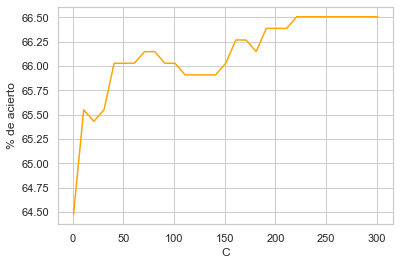

In [24]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

pd.options.mode.chained_assignment = None

df = pd.read_csv("abalone_original.csv")

new_df = df.copy()

new_df['newRings_1'] = np.where(df['rings'] <= 8,1,0)
new_df['newRings_2'] = np.where(((df['rings'] > 8) & (df['rings'] <= 10)), 2,0)
new_df['newRings_3'] = np.where(df['rings'] > 10,3,0)

new_df['newRings'] = new_df['newRings_1'] + new_df['newRings_2'] + new_df['newRings_3']

x_data = new_df.drop(['newRings','rings','sex','newRings_1','newRings_2','newRings_3'], axis = 1)
x_data.info()
y = new_df['newRings']

x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

def SVM_KernelLinear(x_train, y_train, x_test, y_test, C):
    svm = SVC(C=C, kernel='linear', tol=1e-3, max_iter=-1)
    svm.fit(x_train, y_train)
    accuracy = svm.score(x_test, y_test)

    print("Porcentaje de acierto (C = {}): {:.2f}%".format(C, accuracy * 100))
    return accuracy


def prueba():
    cs = np.arange(1, 302, 10)
    percentages = np.zeros(len(cs))

    for i in range(len(cs)):
        percentages[i] = SVM_KernelLinear(x_train, y_train, x_test, y_test, cs[i]) * 100

    plt.plot(cs, percentages, c="orange")
    plt.xlabel("C")
    plt.ylabel("% de acierto")
    plt.show()

# Realizamos experimentos individuales con C = 11, 21, 31 ..... 201
prueba()


***

# Conclusiones

Con todas las predicciones vistas en el apartado anterior podemos sacar ciertas conclusiones. Principalmente nos centramos en la comparación de eficacia entre técnicas, pero también hemos comparado una misma técnica sobre distintos atributos para cribar los menos útiles a la hora de predecir valores.

Utilizando la regresión lineal sobre longitud, diámetro, altura y los distintos pesos notamos como destaca favorablemente como valor estable el peso completo del abalón, con un 99.07% de precisión en la predicción. El resto de valores se encuentran en un intervalo de más del 90%, exceptuando la altura con un 81.47% de precisión. A pesar de ser un dato con un alto porcentaje de precisión sería interesante desestimarlo para futuras precicciones conjuntas.

Por otra parte, cuando nos centramos en el sexo del abulón, podemos ver como la técnica empleada afecta notablemente a la precisión del resultado. La regresión logística destaca con un 57%, mientras que redes neuronales se queda en un 51%. Ciertamente, se queda en un porcentaje cercano al de la arbitrariedad de lanzar una moneda al aire y predecir si saldrá cara o cruz.

De manera similar, en la predicción de los anillos el mayor resultado se produce con regresión lineal, con un 51% de precisión. Tanto redes neuronales como regresión logística no superan el 26% de acierto en la predicción. 

En la predicción más importante, que es la que comenzaba la premisa de la investigación, podemos concluir que no tenemos suficiente certeza. No podemos utilizar ningún parámetro físico, para evitar la laboriosa tarea de conteo de anillos, para la estimación de la edad de un abalón.


# Bibliografía

***

El link principal de referencia de Kaggle es: https://www.kaggle.com/hurshd0/abalone-uci

El Dataset fue sacado originalmente del repositorio de UCI Machine Learning: https://archive.ics.uci.edu/ml/datasets/Abalone
